<a href="https://colab.research.google.com/github/Joaco15/ProyectoDS_Parte-II_TAPIA/blob/main/ProyectoDS_Parte_II_TAPIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resumen:**
El presente trabajo reúne los principales pasos y hallazgos realizados en torno al proyecto de clasificación de transacciones fraudulentas, este proyecto se realiza en torno a un dataset que contiene datos de las transacciones como por ejemplo, el número identificador de la transacción, la tienda en donde fue realizada la transacción, la ciudad, el estado, población de la ciudad, monto de la transacción, entre otras, para llegar finalmente a la variable target u objetivo que es una variable tipo boolean (1/0) que indica si la transacción fue o no fraudulenta.

El proyecto consta de 5 grandes pasos:
1) En primer lugar, un análisis exploratorio exhaustivo, en donde se carga el dataset, se analizan valores faltantes y/o aberrantes dentro de las columnas de este, se realizan casteos a las variables y distintos gráficos univariados, bivariados y multivariados en búsqueda de las principales variables que nos ayudarán a entender de mejor forma el problema y posteriormente a formar parte del modelo de machine learning.
2) Seleccionar las principales variables a utilizar en el modelo de machine learning en torno a criterio experto y resultados del análisis exploratorio.
3) Elección de un modelo de clasificación que se ajuste apropiadamente al modelo.
4) Cálculo de métricas básicas del modelo de clasificación.
5) Conclusiones.**texto en negrita**

# **Objetivo**:
El objetivo del proyecto es encontrar un modelo de machine learning que se ajuste bien a los datos, es decir, que permita predecir de manera eficiente si una transacción será fraudulenta o no en base a un determinado set de variables, para lo cual, será imperante realizar un exhaustivo EDA en torno al dataset, de tal forma de tener un conjunto de datos óptimo para el modelo.

# **Contexto comercial**:
 La información resultante de este proyecto puede ser de mucha utilidad para distintos grupos de empresas que forman parte del ecosistema de medios de pago: por un lado, para empresas adquirentes o procesadoras de pago, quienes pueden robustecer sus procesos internos de control de fraudes. Por otro lado, a los e-commerce que son víctimas de fraudes, quienes pueden añadir herramientas que sean capaces de predecir en tiempo real potenciales transacciones fraudulentas, añadiendo herramientas de control al proceso de compra que puedan asegurar que una transacción esté exenta de fraude, o bien, minimzar el riesgo, aligerando la carga administrativa que implica la gestión de los fraudes y posibles multas por la reiteración de estos.


# **Hipótesis**:
El modelo de machine learning será capaz de clasificar satisfactoriamente al menos un 90% de las transacciones como fraudulentas en torno a las variables seleccionadas posterior al análisis exploratorio de las variables.




## **Análisis exploratorio de variables**
Se comienza cargando el dataset y las librerías a utilizar en esta etapa del proyecto. El objetivo es encontrar y tratar valores nulos si es que los hay. Luego, realizar distintas gráficas del tipo univariadas, bivariadas y multivariadas para comprender mejor el dataset y obtener las variables que mejor se adecúen al modelo.


In [3]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
##Importar y leer dataframe
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('fraud_data2.csv')


Saving fraud_data2.csv to fraud_data2.csv


In [5]:
##Se chequean los encabezados para verificar que la carga del archivo haya sido realizado correctamente
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [6]:
## Se analiza el tipo de variables del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

De este primer análisis exploratorio, llama la atencion que la variable categórica a predecir (is_fraud) esté seteada como Dtype object, cuando debiese ser un número. Por lo tanto, se verán los distintos valores que contienen esta variable en caso de que se requiera realizar una limpieza. Por otro lado, las variables "trans_date_trans_time" y "dob" (date of birth) debiesen estar en formato fecha, por lo que también se hará el ajuste correspondiente. Por otro lado, el resto de campos que están seteados como "object" serán pasados a "category".

In [7]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1844
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


Se observa que hay 2 valores erróneamente imputados, por lo cual, tan solo se ocupará el primer carácter de dicho valor asumiendo que fue un error de imputación, lo cual se asume que es mejor a simplemente eliminar los registros.

In [8]:
#La siguiente linea de código extrae únicamente el primer carácter
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)

In [9]:
##Se chequea que se haya ejecutado bien la linea de codigo, lo cual ocurrio.
df['is_fraud'].value_counts()

,count
is_fraud,
0,12601
1,1845


In [10]:
## Seteo de variables object a date
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'],format='%d-%m-%Y %H:%M')
df['dob']=pd.to_datetime(df['dob'],format='%d-%m-%Y')

In [11]:
#Seteo del resto de variables tipo object a category
df= df.astype({"merchant":'category', "category":'category',"city":'category',"state":'category',"job":'category',"trans_num":'category'})

In [12]:
##Chequeo de la ejecucion de las ultimas 2 lineas de codigo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14446 non-null  datetime64[ns]
 1   merchant               14446 non-null  category      
 2   category               14446 non-null  category      
 3   amt                    14446 non-null  float64       
 4   city                   14446 non-null  category      
 5   state                  14446 non-null  category      
 6   lat                    14446 non-null  float64       
 7   long                   14446 non-null  float64       
 8   city_pop               14446 non-null  int64         
 9   job                    14446 non-null  category      
 10  dob                    14446 non-null  datetime64[ns]
 11  trans_num              14446 non-null  category      
 12  merch_lat              14446 non-null  float64       
 13  m

Posteriormente, se buscaran valores nulos.

In [13]:
df.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


En este caso, no existen valores nulos en ninguna columna. A continuación, se procede a manipular el dataset para realizar posteriores análisis, en particular, a partir de la columna "trans_date_trans_time", se crearán las columnas "Año", "Mes", "Dia" y "Hora", por último, a partir de la columna dob y trans_date_trans_time, se creará la variable "Edad" como una resta de estas. Para efectos prácticos se crearán con nombre en inglés para mantener el idioma de las variables.

In [14]:
df['Year'] = df['trans_date_trans_time'].dt.year
df['Month'] = df['trans_date_trans_time'].dt.month
df['Day'] = df['trans_date_trans_time'].dt.day
df['Hour'] = df['trans_date_trans_time'].dt.hour
df['Age'] = df['trans_date_trans_time'].dt.year-df['dob'].dt.year

In [15]:
##Verificar la correcta creación de las variables
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,Year,Month,Day,Hour,Age
0,2019-01-04 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,2019,1,4,0,80
1,2019-01-04 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,2019,1,4,15,80
2,2019-01-04 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,2019,1,4,22,80
3,2019-01-04 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,2019,1,4,23,80
4,2019-01-04 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,2019,1,4,23,80


In [16]:
#Se aplica comando describe a las variables numericas del dataset
df.describe()

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,Year,Month,Day,Hour,Age
count,14446,14446.000000,14446.000000,14446.000000,1.444600e+04,14446,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000,14446.000000
mean,2019-12-16 02:14:56.664820480,124.430073,39.787692,-110.874225,1.065370e+05,1971-11-12 11:56:24.687802848,39.787991,-110.874892,0.127717,2019.470926,6.224007,18.625294,13.034681,48.127579
min,2019-01-01 00:00:00,1.000000,20.027100,-165.672300,4.600000e+01,1927-09-09 00:00:00,19.032689,-166.670685,0.000000,2019.000000,1.000000,1.000000,0.000000,18.000000
25%,2019-01-12 16:32:15,12.080000,36.715400,-120.415800,4.930000e+02,1961-04-25 00:00:00,36.794655,-120.146253,0.000000,2019.000000,1.000000,10.000000,7.000000,34.000000
50%,2019-08-05 00:47:30,51.520000,39.666200,-111.098500,1.645000e+03,1974-01-03 00:00:00,39.620953,-111.192629,0.000000,2019.000000,4.000000,20.000000,14.000000,46.000000
75%,2020-12-27 20:52:45,101.030000,41.940400,-101.136000,3.543900e+04,1985-08-21 00:00:00,42.275740,-100.446822,0.000000,2020.000000,12.000000,28.000000,20.000000,59.000000
max,2020-12-31 23:59:00,3261.470000,66.693300,-89.628700,2.383912e+06,2001-07-26 00:00:00,67.510267,-88.646366,1.000000,2020.000000,12.000000,31.000000,23.000000,93.000000
std,NaN,231.352587,5.317039,12.985813,2.902916e+05,NaN,5.360593,12.995596,0.333786,0.499171,5.285541,9.557553,7.290632,17.207193


In [17]:
## Valores únicos de todas las columnas
for col in df.columns:
   print(f'Cantidad de valores únicos en {col}: {len(list(df[col].unique()))}')

Cantidad de valores únicos en trans_date_trans_time: 12126
Cantidad de valores únicos en merchant: 693
Cantidad de valores únicos en category: 14
Cantidad de valores únicos en amt: 9266
Cantidad de valores únicos en city: 176
Cantidad de valores únicos en state: 13
Cantidad de valores únicos en lat: 183
Cantidad de valores únicos en long: 183
Cantidad de valores únicos en city_pop: 174
Cantidad de valores únicos en job: 163
Cantidad de valores únicos en dob: 187
Cantidad de valores únicos en trans_num: 14383
Cantidad de valores únicos en merch_lat: 14376
Cantidad de valores únicos en merch_long: 14380
Cantidad de valores únicos en is_fraud: 2
Cantidad de valores únicos en Year: 2
Cantidad de valores únicos en Month: 12
Cantidad de valores únicos en Day: 31
Cantidad de valores únicos en Hour: 24
Cantidad de valores únicos en Age: 74


A continuación, se da paso al análisis gráfico de las variables, para esto se utilizaran análisis univariados, bivariados y multivariados de las columnas del dataset con el objetivo de elegir aquellas variables que mejor puedan explicar y ayudar a entender el modelo.

# **Gráficas Univariadas, Bivariadas y Multivariadas**

En primer lugar, un gráfico de pie de la variable target is_fraud para comprender si la variable está o no balanceada, así como también, una leyenda de que color es cada valor y el pie chart en %.



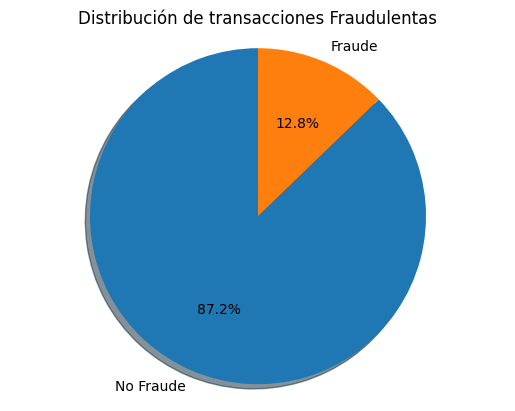

In [18]:
labels = 'No Fraude', 'Fraude'
sizes = df['is_fraud'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribución de transacciones Fraudulentas")
plt.show()



Como se aprecia, la muestra está desbalanceada, dado que hay una notoria cantidad de transacciones no fraudulentas por sobre aquellas que si.

Luego, se necesita saber la cantidad de transacciones fraudulentas sobre el total por año para ver si el año es una variable relevante.



In [19]:
fraudes_por_año = df.groupby(['Year', 'is_fraud'])['is_fraud'].count().reset_index(name='count')
fraudes_por_año = fraudes_por_año.pivot(index='Year', columns='is_fraud', values='count')
fraudes_por_año['fraud_percentage'] = (fraudes_por_año[1] / (fraudes_por_año[0] + fraudes_por_año[1])) * 100
print(fraudes_por_año)


is_fraud     0     1  fraud_percentage
Year                                  
2019      6602  1041         13.620306
2020      5999   804         11.818315


Como se observa, al haber tan solo 2 años de historia, no se puede concluir que el año es una variable relevante en la cantidad de fraudes, dado que entre 2019 y 2020 se observan porcentajes similares.

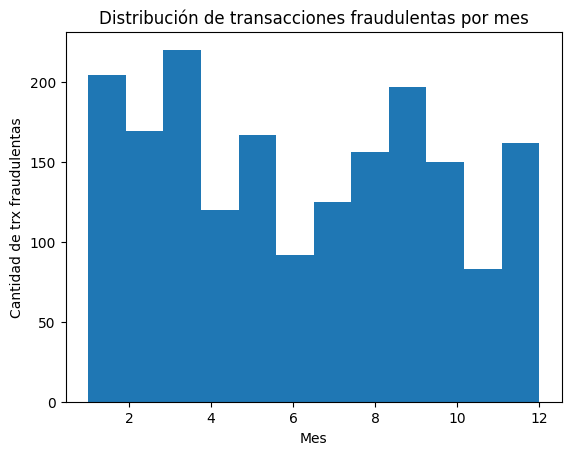

In [20]:
##Análisis gráfico trx fraudulentas por mes
#Histograma
trx_fraudulentas = df[df['is_fraud'] == 1]
plt.hist(trx_fraudulentas['Month'], bins=12)
plt.xlabel('Mes')
plt.ylabel('Cantidad de trx fraudulentas')
plt.title('Distribución de transacciones fraudulentas por mes')
plt.show()

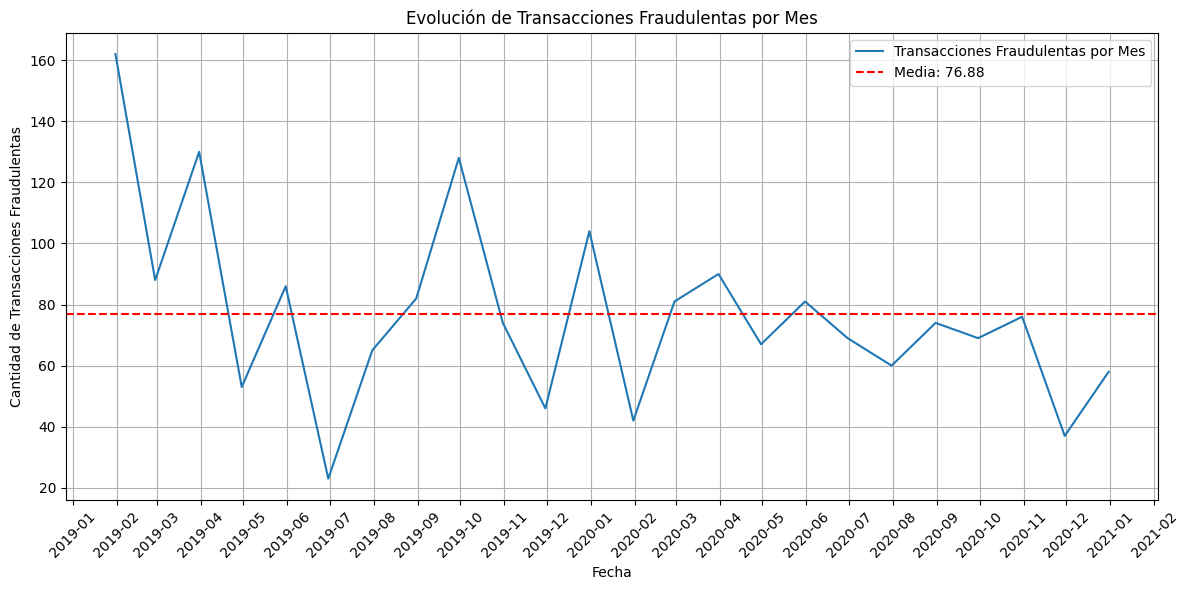

In [21]:
#Grafico de linea
trx_fraudulentas = trx_fraudulentas.set_index('trans_date_trans_time').sort_index()
contador_fraude_mes = trx_fraudulentas.resample('M')['is_fraud'].count()

# 1. Calcular la media de transacciones fraudulentas por mes
media_fraude_mes = contador_fraude_mes.mean()

# Plotear la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(contador_fraude_mes.index, contador_fraude_mes.values, label='Transacciones Fraudulentas por Mes')

# Añadir la línea de la media
plt.axhline(y=media_fraude_mes, color='r', linestyle='--', label=f'Media: {media_fraude_mes:.2f}')

# Formatear el eje X para mostrar todos los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Transacciones Fraudulentas')
plt.title('Evolución de Transacciones Fraudulentas por Mes')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

Se observa un peak de transacciones fraudulentas en 2019, tanto a comienzos de año, como en octubre de dicho año. Por otro lado, en los meses de diciembre se ve una baja cantidad de transacciones fraudulentas. No se observa una componente estacional, por lo cual, juntando todos los antecedentes de la variable, lo mejor será descartarla del análisis al igual que el año.

In [22]:
fraudes_por_dia = df.groupby(['Day', 'is_fraud'])['is_fraud'].count().reset_index(name='count')
fraudes_por_dia = fraudes_por_dia.pivot(index='Day', columns='is_fraud', values='count')
fraudes_por_dia['porc_fraude'] = (fraudes_por_dia[1] / (fraudes_por_dia[0] + fraudes_por_dia[1])) * 100
print(fraudes_por_dia)

is_fraud       0      1  porc_fraude
Day                                 
1          466.0   74.0    13.703704
2          220.0   44.0    16.666667
3          250.0   40.0    13.793103
4          261.0   58.0    18.181818
5          283.0   70.0    19.830028
6          367.0   34.0     8.478803
7          411.0   69.0    14.375000
8          417.0   65.0    13.485477
9          213.0   28.0    11.618257
10         248.0   61.0    19.741100
11         275.0   80.0    22.535211
12         254.0   69.0    21.362229
13         372.0   93.0    20.000000
14         394.0  122.0    23.643411
15         400.0   76.0    15.966387
16         235.0   53.0    18.402778
17         230.0   67.0    22.558923
18         259.0   51.0    16.451613
19         226.0   45.0    16.605166
20         353.0   52.0    12.839506
21         456.0   19.0     4.000000
22          12.0   41.0    77.358491
23           NaN   63.0          NaN
24         234.0   58.0    19.863014
25         614.0   72.0    10.495627
2

Como se aprecia, salvo algunos valores extraños en la muestra, no se observa algun patron que ayude a explicar los fraudes, por ejemplo, un aumento de fraudes en alguna epoca particular del mes.


In [23]:
fraudes_por_hora = df.groupby(['Hour', 'is_fraud'])['is_fraud'].count().reset_index(name='count')
fraudes_por_hora = fraudes_por_hora.pivot(index='Hour', columns='is_fraud', values='count')
fraudes_por_hora['porc_fraude'] = (fraudes_por_hora[1] / (fraudes_por_hora[0] + fraudes_por_hora[1])) * 100
print(fraudes_por_hora)

is_fraud    0    1  porc_fraude
Hour                           
0         413  174    29.642249
1         439  174    28.384992
2         379  142    27.255278
3         417  147    26.063830
4         406    7     1.694915
5         396   10     2.463054
6         408    7     1.686747
7         429    9     2.054795
8         404   14     3.349282
9         385   12     3.022670
10        408   10     2.392344
11        395    7     1.741294
12        607   17     2.724359
13        624   14     2.194357
14        614   16     2.539683
15        647   24     3.576751
16        629   24     3.675345
17        646   20     3.003003
18        644   20     3.012048
19        656   11     1.649175
20        679   23     3.276353
21        674   18     2.601156
22        652  468    41.785714
23        650  477    42.324756


En este caso, si se puede apreciar un aumento de transacciones fraudulentas a las horas nocturnas, esto puede dar cuenta de una tendencia que pueda ayudar a explicar el modelo. Se complementará con un análisis gráfico bivariado.

In [24]:
fraudes_por_hora = df.groupby(['Hour', 'is_fraud'])['is_fraud'].count().reset_index(name='count')

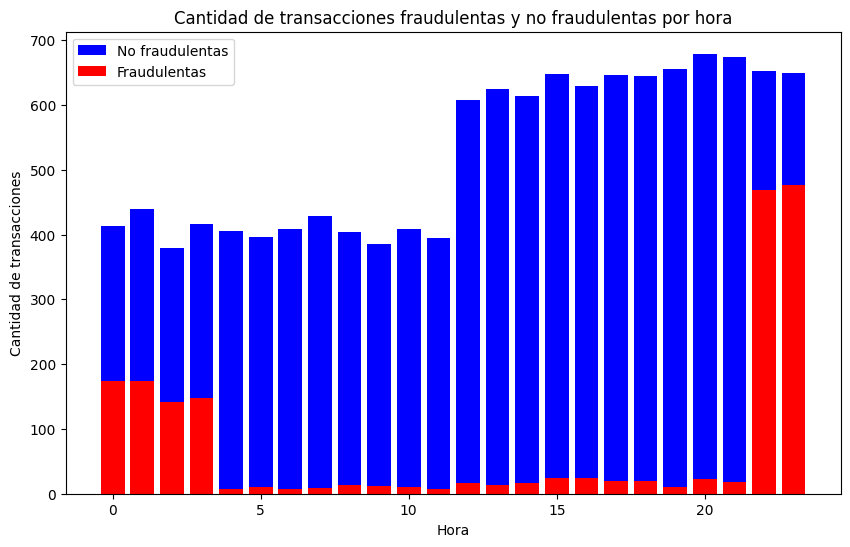

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(fraudes_por_hora[fraudes_por_hora['is_fraud'] == 0]['Hour'], fraudes_por_hora[fraudes_por_hora['is_fraud'] == 0]['count'], color='blue', label='No fraudulentas')
plt.bar(fraudes_por_hora[fraudes_por_hora['is_fraud'] == 1]['Hour'], fraudes_por_hora[fraudes_por_hora['is_fraud'] == 1]['count'], color='red', label='Fraudulentas')
plt.xlabel('Hora')
plt.ylabel('Cantidad de transacciones')
plt.title('Cantidad de transacciones fraudulentas y no fraudulentas por hora')
plt.legend()
plt.show()

En este gráfico se puede apreciar que a mayores horas de la noche o madrugada, la cantidad de transacciones fraudulentas aumenta.

Luego, se procede a analizar cantidad de transacciones fraudulentas por categoría.

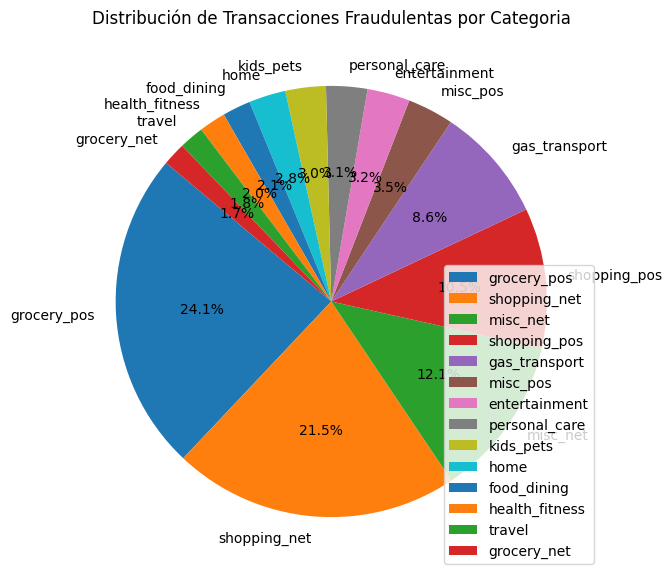

In [26]:
## Ahora, se buscara graficar por categoria la cantidad de transacciones fraudulentas
category_distribution = trx_fraudulentas['category'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Transacciones Fraudulentas por Categoria')
plt.legend(loc="lower right",labels=category_distribution.index,fontsize=10)
plt.show()


Al ser muchas categorias, preferentemente solo se mostrara el top 10


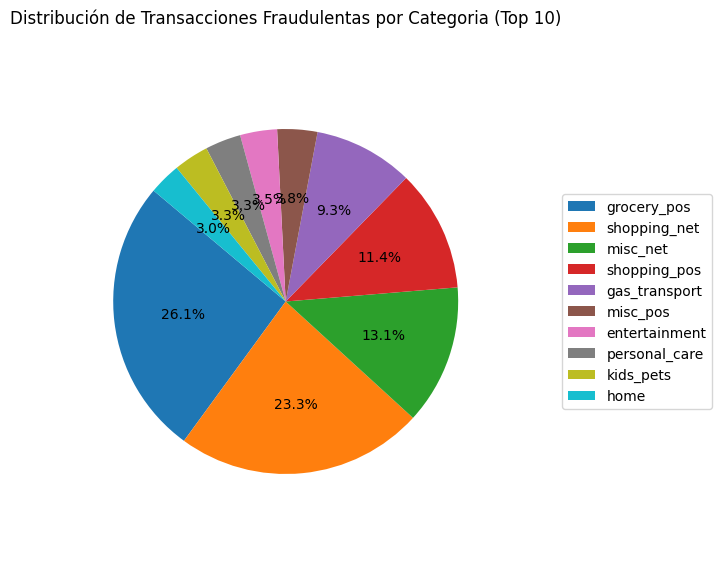

In [27]:
top_10_categories = category_distribution.head(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10_categories, autopct='%1.1f%%', startangle=140, radius=0.8)
plt.title('Distribución de Transacciones Fraudulentas por Categoria (Top 10)')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), labels=top_10_categories.index, fontsize=10)
plt.show()

En este caso, pareciera ser que hay ciertas categorías más propensas a ser fraudulentas, por lo que se considerará esta variable para el análisis.

Ahora se busca analizar la relación que existe entre la población de la ciudad donde ocurrió el fraude, y la cantidad de fraudes mediante un scatterplot.

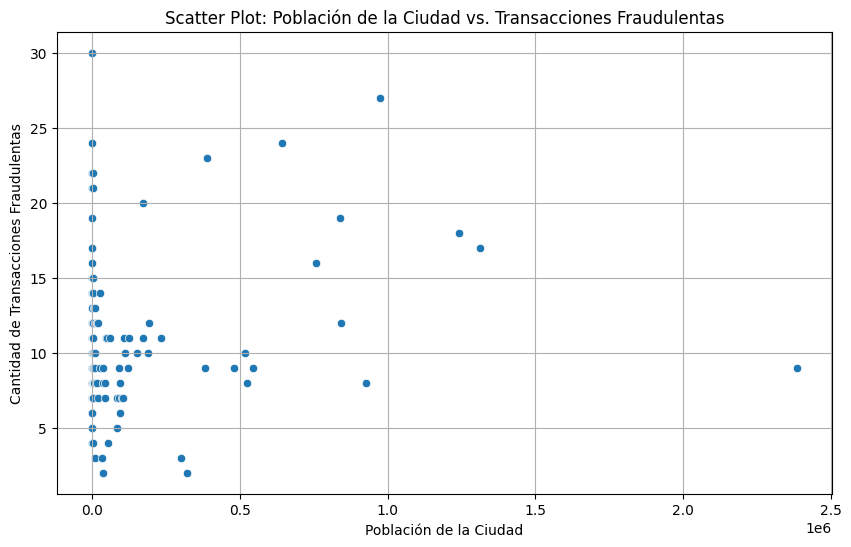

In [28]:
fraud_per_city_pop = df[df['is_fraud'] == 1].groupby('city_pop')['trans_num'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='trans_num', data=fraud_per_city_pop)
plt.xlabel('Población de la Ciudad')
plt.ylabel('Cantidad de Transacciones Fraudulentas')
plt.title('Scatter Plot: Población de la Ciudad vs. Transacciones Fraudulentas')
plt.grid(True)
plt.show()

In [29]:
df_corr = fraud_per_city_pop[['city_pop', 'trans_num']]

In [30]:
coef_corr = df_corr['city_pop'].corr(df_corr['trans_num'], method='pearson')
print(coef_corr)

0.1697075529826166


El coeficiente de correlación si bien es cierto es positivo, es débil, por lo que a priori no se puede indicar que a mayor población, mayor cantidad de fraudes, sin embargo, la evidencia bibliográfica sugiere que a mayor población, mayor cantidad de fraudes, por lo que no se descarta el uso de esta variable.
https://www.johnmarshallbank.com/resources/security-center/fraud-facts-and-statistics/

https://www.johnmarshallbank.com/resources/security-center/fraud-facts-and-statistics/



Ahora se busca analizar la importancia de la variable "monto", para lo cual, se realizará un análisis mutlivariado entre categoria y monto mediante la herramienta "hue", la cual nos permitirá diferenciar transacciones fraudulentas de aquellas que no.

<ipython-input-31-e6316d23b6d2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='amt', data=df, hue='is_fraud', ci=None)


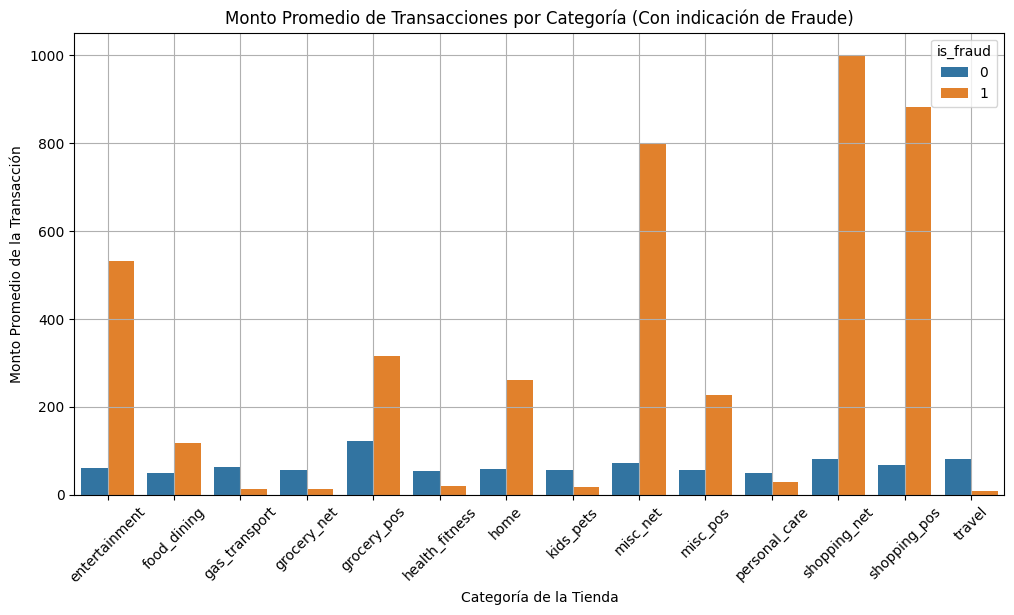

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='amt', data=df, hue='is_fraud', ci=None)
plt.xlabel('Categoría de la Tienda')
plt.ylabel('Monto Promedio de la Transacción')
plt.title('Monto Promedio de Transacciones por Categoría (Con indicación de Fraude)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Como se observa, las transacciones fraudulentas en prácticamente todas las categorías tienen valores mayores que aquellas que no.



Ahora, se analizará la variable edad mediante un histograma.

Text(0, 0.5, 'Frecuencia')

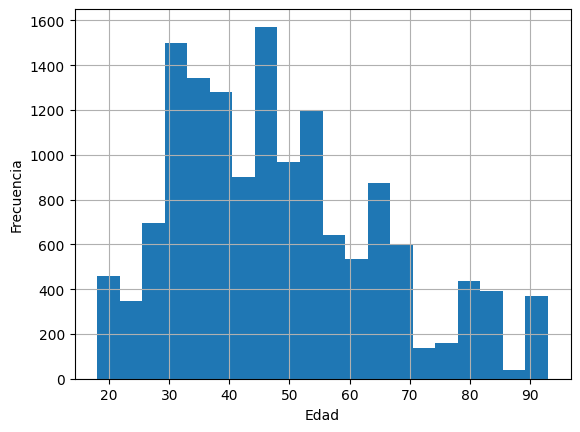

In [32]:
df['Age'].hist(bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Se observa una distribución relativamente similar a la distribución normal, por lo que la variable será utilizada para el modelo. Se extraen algunas conclusiones importantes como por ejemplo, que la mayoria de las personas sujetas a fraude se encuentran entre 30-70 años.


In [33]:
## Se analizan la cantidad de fraudes segun el trabajo de la persnoa que sufrio el fraude, para ver una posible relacion entre tipos de trabajo y cantidad de fraudes
df.groupby('job')['is_fraud'].sum().sort_values(ascending=False)




<ipython-input-33-481c5309e3af>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('job')['is_fraud'].sum().sort_values(ascending=False)


,is_fraud
job,
"""Surveyor, minerals""",37
"""Administrator, education""",30
Colour technologist,29
Systems analyst,28
"""Surveyor, land/geomatics""",24
...,...
Clinical research associate,3
Contractor,2
Water engineer,2


<ipython-input-34-bd5b2a1b83da>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('job')['is_fraud'].sum().sort_values(ascending=False).head(10).plot(kind='bar')


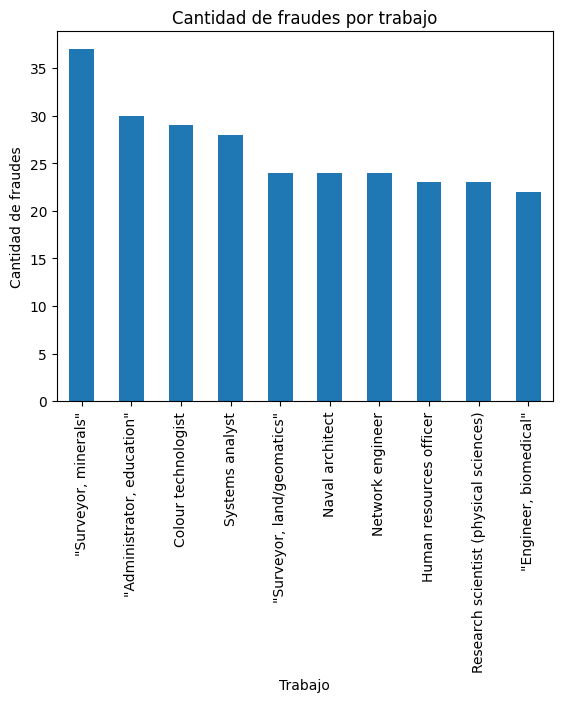

In [34]:
## Grafico del top 10
df.groupby('job')['is_fraud'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad de fraudes')
plt.title('Cantidad de fraudes por trabajo')
plt.show()


Pareciera ser que hay algunos trabajos que tienden a ser más víctimas de fraude, esto puede ser porque quizás está relacionado a un alto nivel de ingresos por lo tanto una mayor propensión a comprar, sin embargo, esto es una hipótesis. Una posibilidad de mejora del proyecto podría ser categorizar esta columna para que los trabajos no se encuentren tan granulares, sino que por ejemplo, agrupar algunos en "Administration", otros en "Minery", "Business", etc. Teniendo esto en cuenta, esta variable será de interés para el modelo.

Por último, pese a que no se realizará un análisis exhaustivo de las variables "merch_lat", "merch_long", "lat" y "lon", la bibliografía sugiere que a mayor distancia entre la tienda donde se compra y el lugar donde el comprador realiza la compra, mayor es la probabilidad de fraude. Una posibilidad de mejora de este proyecto es crear una variable "distancia" que transacción a transacción pueda medir la distancia a partir de las coordenadas de latitud y longitud. Sin embargo, esto queda fuera del alcance de este proyecto por motivos prácticos. De momento, tras revisar bibliografías y desarrollos varios de este proyecto en Kaggle, se decide conservar estas variables para efecto del análisis.

# Feature Selection
En base a todos los análisis realizados en la etapa exploratoria, las variables a conservar del dataset para efecto del modelo de machine learning serán las siguientes:
1. Category
2. Amt
3. Lat
4. Long
5. city pop
6. job
7. merch-lat
8. merch-long
9. age
10. hour
11. is_fraud(variable objetivo)

El resto de variables serán dropeadas del dataset.


In [41]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'Year', 'Month', 'Day', 'Hour', 'Age'],
      dtype='object')

In [35]:
##Eliminacion de variables
df_2=df.drop(columns=['trans_date_trans_time', 'state', 'city', 'dob', 'trans_num','Month','Year','Day', 'merchant','state','city'])

In [36]:
##Chequeo de nuevo dataset para el modelo
df_2.head()

,category,amt,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,Hour,Age
0,grocery_net,14.37,64.7556,-165.6723,145,"""Administrator, education""",65.654142,-164.722603,1,0,80
1,shopping_net,966.11,64.7556,-165.6723,145,"""Administrator, education""",65.468863,-165.473127,1,15,80
2,misc_pos,49.61,64.7556,-165.6723,145,"""Administrator, education""",65.347667,-165.914542,1,22,80
3,grocery_pos,295.26,64.7556,-165.6723,145,"""Administrator, education""",64.445035,-166.080207,1,23,80
4,health_fitness,18.17,64.7556,-165.6723,145,"""Administrator, education""",65.447094,-165.446843,1,23,80


In [37]:
##Chequeo de tipo de variables, aquellas que sean categoricas deberan ser transformadas en numericas
df_2.dtypes

,0
category,category
amt,float64
lat,float64
long,float64
city_pop,int64
job,category
merch_lat,float64
merch_long,float64
is_fraud,int64
Hour,int32


## Modelo de Machine Learning: Random forest
En este caso, se escogió el modelo random forest debido a que, acorde a la bibliografía, es un modelo que se adecúa bien a dataframes con hartas variables (como lo es en este caso, en el cual tenemos 10 variables + la variable target). Por otro lado, es un modelo que generalmente ofrece buenos resultados sin la necesidad de tener que hacer muchos ajustes a los hiperparámetros, lo cual le añade una capa de dificultad al problema, pero que a la vez, puede ser un evolutivo de este proyecto para mejorar las métricas de rendimiento del modelo.

In [53]:
##Importar librerias para modelos a utilizar de machine learning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [39]:
## Transformar columnas categorias a valores mediante label encoder
columnas_categoricas = ['category', 'job']
label_encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    df_2[col] = le.fit_transform(df_2[col])
    label_encoders[col] = le

In [40]:
##Chequear transformacion exitosa
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    14446 non-null  int64  
 1   amt         14446 non-null  float64
 2   lat         14446 non-null  float64
 3   long        14446 non-null  float64
 4   city_pop    14446 non-null  int64  
 5   job         14446 non-null  int64  
 6   merch_lat   14446 non-null  float64
 7   merch_long  14446 non-null  float64
 8   is_fraud    14446 non-null  int64  
 9   Hour        14446 non-null  int32  
 10  Age         14446 non-null  int32  
dtypes: float64(5), int32(2), int64(4)
memory usage: 1.1 MB


In [41]:
## Creacion de conjuntos X e Y para modelo de machine learning
X = df_2.drop(columns=['is_fraud'])
y = df_2['is_fraud']

In [42]:
## Se separan conjuntos de testeo y entranmiento inicialmente en proporcion 80/20, que es una cifra aceptada a nivel metodologico. El valor de la semilla es un valor random.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [43]:
##Ejecucion del modelo, se utiliza parámetro n_estimators en 100 lo que implica que se crearán 100 árboles de decisión, este valor se utiliza generalmente por convención, pero se puede ajustar al igual que una serie de hiperparámetros adicionales que en este caso no se setearán con valores específicos
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)


RandomForestClassifier()

In [44]:
#Almacenar valores de la prediccion sobre el conjunto de testeo en la variable y_pred
y_pred=rf.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Métricas de rendimiento
Una vez ejecutado el modelo, es importante poder medir su rendimiento y como se ajustó a los datos, para esto, se ocuparan las principales métricas de rendimiento de problemas de clasificación, estas son: Precision, Recall, Accuracy y el Puntaje F1, entre otras.

In [63]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


In [47]:
accuracy

0.9823529411764705

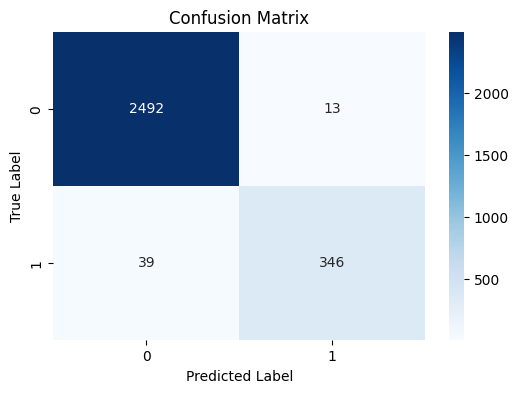

In [75]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: fraudulento
#Clase 0: no fraudulento

In [55]:
##Metrica de precision
precision_positiva = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negativa = metrics.precision_score(y_test, y_pred, pos_label=0)
precision_positiva, precision_negativa

(0.9664804469273743, 0.9845971563981043)

In [57]:
##Metrica de recall
metrics.recall_score(y_test, y_pred, pos_label=1), metrics.recall_score(y_test, y_pred, pos_label=0)

(0.8987012987012987, 0.9952095808383233)

In [58]:
f1_positivo = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_negativo = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_positivo, f1_negativo

(0.9313593539703903, 0.9898749255509232)

In [59]:
##Probando cno los datos de entreamiento
preds_train = rf.predict(X_train)
f1_positivo = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_positivo, f1_negativo

(1.0, 1.0)

Los resultados indican que hay un problema de overfitting, dado que el conjunto de entrenamiento aprendio bien o casi a la perfeccion con el conjunto de entrenamiento, pero no asi con el de testeo, en donde si bien, las metricas son buenas, existe una diferencia respecto de los datos de entrenamiento, esto se puede estar debiendo, por ejemplo, a que la clase esta desbalanceada, habiendo muchos mas casos de transacciones no fraudulentas que transacciones fraudulentas. Dentro de las posibilidades de mejora para pulir de mejor forma el modelo random forest, he averiguado las siguientes:
-Tunear los demas hiperparametros (max_depth, min_samples_leaf, etc.). Utilizar lineas de codigo que me permitan identificar los hiperparametros optimos.
-Generar muestras sintetitcas de la clase minoritaria para balancear el dataset mediante SMOTE.

In [60]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10096
           1       1.00      1.00      1.00      1460

    accuracy                           1.00     11556
   macro avg       1.00      1.00      1.00     11556
weighted avg       1.00      1.00      1.00     11556



In [62]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2505
           1       0.97      0.90      0.93       385

    accuracy                           0.98      2890
   macro avg       0.98      0.95      0.96      2890
weighted avg       0.98      0.98      0.98      2890



## Conclusiones
Al revisar los resultados en el conjunto de testeo, se observan buenos resultados en las métricas de rendimiento del modelo de random forest, por ejemplo en la métrica de accuracy, se logran predecir correctamente un 98.2% de lo casos. Por otro lado, la métrica de precisión muestra que en un 97% de los casos se identifican correctamente transacciones fraudulentas y en un 98% se identifican correctamente transaccion incorrecta. Por otro lado, el recall, es decir,la tasa de verdaderos positivos, es cercana a 1 en la clase 0 y cercana a un 90% en la clase 1, esto quiere decir que el modelo es muy bueno capturando transacciones no fraudulentas, pero que al rededor de un 10% de las transacciones fraudulentas no son capturadas por el modelo. El F1 es un valor que tiende entre 0 y 1, mientras más cercano a 1, mejor es el rendimiento del modelo, dado que no habrían ni falsos positivos ni falsos negativos, mientras que en caso contrario, mientras más cercano a 0, peor es la calidad del modelo. En este caso, el f1-score de la clase 0 es sobresaliente, sin embargo, en la clase 1 pueden haber mayor cantidad de falsos positivos o falsos negativos. En el caso de la detección de transacciones fraudulentas, se espera que se puedan predecir con éxito la mayor cantidad posible de transacciones fraudulentas, aunque esto pueda conllevar a una cierta cantidad de falsos positivos, lo importante es reducir la cantidad de falsos negativos.

Por otro lado, un problema que aqueja este modelo es el overfitting, como se vió en las líneas de código previas, existe un evidente overfitting dado que el modelo aprendió a la perfección en el conjunto de entrenamiento, sin embargo, las métricas varían en los datos de testeo. El overfitting se puede deber a muchas razones, una de ellas, es el desbalance de clases, como se observó en un comienzo, el dataset cuenta con un 87% de casos no fraudulentos y 13% fraudulentos, lo cual es una proporción común en este tipo de problemas de detección de fraudes, por lo tanto, se sugiere continuar perfeccionando este modelo ya sea, balanceando la clase mediante la tecnica SMOTE, o bien, reajustando los hiperparámetros del modelo random forest, o bien, probando con algún otro modelo de clasificación (KNN, SVM, GBM, etc.).

Respecto de la hipotesis incial, podríamos afirmar que se cumple dado que se están prediciendo con valores sobresalientes las transacciones fraudulentas, sin embargo, el overfitting es un problema a solucionar para extrapolar este análisis a conjuntos de datos desconocidos por el modelo, por lo que no se descarta que pueda existir un mejor modelo para este dataset, y desde luego el actual modelo es mejorable. Por otro lado, respecto de las hipótesis iniciales planteadas en la primera entrega de este trabajo, estas son:
1. Las transacciones de montos más altos tienden a ser más fraudulentas.
2. Ciertas categorías de comercios tienen una mayor tendencia a ser víctimas de transacciones fraudulentas.
3. ¿Existe una época del año en la cual sean más frecuentes las transacciones fraudulentas?

En primer lugar, efectivamente se demostró que generalmente, en todas las categorías, las transacciones fraudulentas presentan mayores montos que aquellas que no. Por otro lado, efectivamente hay un pool de categorías de comercios que son más propensas a tener fraudes que otras, un complemento interesante sería poder saber el porqué dichas categorías son más víctimas de fraude que otras. Por último, no existe una época del año en la cual sea más frecuente el fraude al menos en este dataset, sin embargo, si existen horarios en los cuales los fraudes aumenta, esto es un importante insight para robustecer los procesos de control de transacciones fraudulentas en determinados horarios para minimizar este tipo de ciberdelito.